# BUGRA CAN ASCI
# CAPSTONE PROJECT Q3: Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

Import NYC311 HPD data

In [356]:
import pandas as pd
import numpy as np

df_311 = pd.read_csv("NYC311_Data.csv")
df_311.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,0,2019-12-14T16:55:57.000,45158002,HEAT/HOT WATER,11235.0,2750 HOMECREST AVENUE,HOMECREST AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.584298,-73.956290,NaN,RESIDENTIAL BUILDING,Open
1,1,2019-12-14T22:53:21.000,45160691,HEAT/HOT WATER,11355.0,45-15 COLDEN STREET,COLDEN STREET,ADDRESS,Flushing,The complaint you filed is a duplicate of a co...,QUEENS,40.750501,-73.823002,NaN,RESIDENTIAL BUILDING,Open
2,2,2019-12-14T16:56:02.000,45163196,HEAT/HOT WATER,10001.0,436 WEST 34 STREET,WEST 34 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.753980,-73.997744,NaN,RESIDENTIAL BUILDING,Open
3,3,2019-12-11T21:05:30.000,45133435,HEAT/HOT WATER,10006.0,1 LIBERTY PLAZA,LIBERTY PLAZA,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.709430,-74.011102,2019-12-13T16:45:25.000,RESIDENTIAL BUILDING,Closed
4,4,2019-12-14T06:45:53.000,45157328,HEAT/HOT WATER,10468.0,2319 LORING PLACE NORTH,LORING PLACE NORTH,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862075,-73.908133,NaN,RESIDENTIAL BUILDING,Open


In [357]:
df_311.drop(labels=df_311.columns.values[0], axis=1, inplace=True)
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-14T16:55:57.000,45158002,HEAT/HOT WATER,11235.0,2750 HOMECREST AVENUE,HOMECREST AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.584298,-73.956290,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-14T22:53:21.000,45160691,HEAT/HOT WATER,11355.0,45-15 COLDEN STREET,COLDEN STREET,ADDRESS,Flushing,The complaint you filed is a duplicate of a co...,QUEENS,40.750501,-73.823002,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-14T16:56:02.000,45163196,HEAT/HOT WATER,10001.0,436 WEST 34 STREET,WEST 34 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.753980,-73.997744,NaN,RESIDENTIAL BUILDING,Open
3,2019-12-11T21:05:30.000,45133435,HEAT/HOT WATER,10006.0,1 LIBERTY PLAZA,LIBERTY PLAZA,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.709430,-74.011102,2019-12-13T16:45:25.000,RESIDENTIAL BUILDING,Closed
4,2019-12-14T06:45:53.000,45157328,HEAT/HOT WATER,10468.0,2319 LORING PLACE NORTH,LORING PLACE NORTH,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862075,-73.908133,NaN,RESIDENTIAL BUILDING,Open


### Data Wrangling

In [358]:
headers = ["Created Date", "Unique Key", "Complaint Type", "Incident Zip",
           "Incident Address", "Street Name", "Address Type", "City",
           "Resolution Description", "Borough", "Latitude", "Longitude",
           "Closed Date", "Location Type", "Status"]
df_311.columns = headers
df_311.head()

,Created Date,Unique Key,Complaint Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude,Closed Date,Location Type,Status
0,2019-12-14T16:55:57.000,45158002,HEAT/HOT WATER,11235.0,2750 HOMECREST AVENUE,HOMECREST AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.584298,-73.956290,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-14T22:53:21.000,45160691,HEAT/HOT WATER,11355.0,45-15 COLDEN STREET,COLDEN STREET,ADDRESS,Flushing,The complaint you filed is a duplicate of a co...,QUEENS,40.750501,-73.823002,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-14T16:56:02.000,45163196,HEAT/HOT WATER,10001.0,436 WEST 34 STREET,WEST 34 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.753980,-73.997744,NaN,RESIDENTIAL BUILDING,Open
3,2019-12-11T21:05:30.000,45133435,HEAT/HOT WATER,10006.0,1 LIBERTY PLAZA,LIBERTY PLAZA,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.709430,-74.011102,2019-12-13T16:45:25.000,RESIDENTIAL BUILDING,Closed
4,2019-12-14T06:45:53.000,45157328,HEAT/HOT WATER,10468.0,2319 LORING PLACE NORTH,LORING PLACE NORTH,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862075,-73.908133,NaN,RESIDENTIAL BUILDING,Open


In [359]:
print(df_311.dtypes)
print(df_311.shape)

Created Date               object
Unique Key                  int64
Complaint Type             object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
Closed Date                object
Location Type              object
Status                     object
dtype: object
(5959628, 15)


In [246]:
condition1 = (df_311["Complaint Type"]=='HEATING')
df_311["Complaint Type"] = np.where(condition1, 'HEAT/HOT WATER', df_311['Complaint Type'])

Use the dataset related to complaint type 'HEAT/HOT WATER' and of borough 'BRONX'.

In [247]:
df_heat = df_311[(df_311['Complaint Type']=='HEAT/HOT WATER') & (df_311['Borough']=='BRONX')]
df_heat.head()


,Created Date,Unique Key,Complaint Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude,Closed Date,Location Type,Status
4,2019-12-14T06:45:53.000,45157328,HEAT/HOT WATER,10468.0,2319 LORING PLACE NORTH,LORING PLACE NORTH,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.862075,-73.908133,NaN,RESIDENTIAL BUILDING,Open
8,2019-12-14T22:05:02.000,45158265,HEAT/HOT WATER,10458.0,2980 BRIGGS AVENUE,BRIGGS AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.871480,-73.885203,NaN,RESIDENTIAL BUILDING,Open
11,2019-12-14T18:52:07.000,45157385,HEAT/HOT WATER,10462.0,1980 UNIONPORT ROAD,UNIONPORT ROAD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.850223,-73.868624,NaN,RESIDENTIAL BUILDING,Open
14,2019-12-14T06:47:20.000,45157967,HEAT/HOT WATER,10468.0,3235 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877488,-73.885258,NaN,RESIDENTIAL BUILDING,Open
16,2019-12-11T21:58:07.000,45138915,HEAT/HOT WATER,10462.0,2001 NEWBOLD AVENUE,NEWBOLD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.832627,-73.856907,2019-12-13T16:15:43.000,RESIDENTIAL BUILDING,Closed


In [248]:
df_heat.dropna(inplace=True)
df_heat.reset_index(inplace=True)
df_heat.head()

/Users/bugracanasci/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Created Date,Unique Key,Complaint Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude,Closed Date,Location Type,Status
0,16,2019-12-11T21:58:07.000,45138915,HEAT/HOT WATER,10462.0,2001 NEWBOLD AVENUE,NEWBOLD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.832627,-73.856907,2019-12-13T16:15:43.000,RESIDENTIAL BUILDING,Closed
1,28,2019-12-11T23:29:10.000,45134495,HEAT/HOT WATER,10467.0,55 EAST 210 STREET,EAST 210 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.880196,-73.882133,2019-12-13T17:10:14.000,RESIDENTIAL BUILDING,Closed
2,56,2019-12-11T23:29:57.000,45137213,HEAT/HOT WATER,10453.0,1815 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.849463,-73.912264,2019-12-13T17:11:38.000,RESIDENTIAL BUILDING,Closed
3,64,2019-12-14T10:52:46.000,45157119,HEAT/HOT WATER,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423,2019-12-14T11:34:46.000,RESIDENTIAL BUILDING,Closed
4,75,2019-12-11T21:48:07.000,45136296,HEAT/HOT WATER,10458.0,561 EAST 187 STREET,EAST 187 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.856201,-73.888762,2019-12-13T17:50:48.000,RESIDENTIAL BUILDING,Closed


In [249]:
df_heat.drop(labels=df_heat.columns.values[0], axis=1, inplace=True)
df_heat.head()

,Created Date,Unique Key,Complaint Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude,Closed Date,Location Type,Status
0,2019-12-11T21:58:07.000,45138915,HEAT/HOT WATER,10462.0,2001 NEWBOLD AVENUE,NEWBOLD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.832627,-73.856907,2019-12-13T16:15:43.000,RESIDENTIAL BUILDING,Closed
1,2019-12-11T23:29:10.000,45134495,HEAT/HOT WATER,10467.0,55 EAST 210 STREET,EAST 210 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.880196,-73.882133,2019-12-13T17:10:14.000,RESIDENTIAL BUILDING,Closed
2,2019-12-11T23:29:57.000,45137213,HEAT/HOT WATER,10453.0,1815 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.849463,-73.912264,2019-12-13T17:11:38.000,RESIDENTIAL BUILDING,Closed
3,2019-12-14T10:52:46.000,45157119,HEAT/HOT WATER,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.854439,-73.898423,2019-12-14T11:34:46.000,RESIDENTIAL BUILDING,Closed
4,2019-12-11T21:48:07.000,45136296,HEAT/HOT WATER,10458.0,561 EAST 187 STREET,EAST 187 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.856201,-73.888762,2019-12-13T17:50:48.000,RESIDENTIAL BUILDING,Closed


Read PLUTO data for 'BRONX'

In [360]:
df_Bx = pd.read_csv("/Users/bugracanasci/Desktop/CANASCI/Data Science/PLUTO_for_WEB/BX_18v1.csv",
                   usecols=['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
                            'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 
                            'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                            'ZipCode', 'YCoord', 'XCoord'])

In [361]:
df_Bx.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


In [362]:
print(df_Bx.dtypes)
print(df_Bx.shape)

Lot             int64
ZipCode       float64
Address        object
LotArea         int64
BldgArea        int64
ResArea         int64
OfficeArea      int64
RetailArea      int64
NumBldgs        int64
NumFloors     float64
LotDepth      float64
BldgDepth     float64
YearBuilt       int64
YearAlter1      int64
BuiltFAR      float64
ResidFAR      float64
CommFAR       float64
FacilFAR      float64
XCoord        float64
YCoord        float64
dtype: object
(89854, 20)


In [363]:
df_Bx.dropna(axis=0, inplace=True)
df_Bx['YearBuilt'].replace(0, 2019, inplace=True)
df_Bx['Age'] = 2019 - df_Bx['YearBuilt']
df_Bx

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,...,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Age
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,...,0.00,2019,0,0.00,6.02,5.0,6.5,1005957.0,232162.0,0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,...,16.00,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0,88
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,...,200.00,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0,88
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,...,85.00,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0,88
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,...,70.00,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89840,877,10471.0,6007 RIVERDALE AVENUE,1900,1044,1044,0,0,1,2.0,...,29.00,1910,0,0.55,0.90,0.0,2.0,1010815.0,270401.0,109
89842,1,10471.0,6301 RIVERDALE AVENUE,1845000,237021,0,0,0,20,12.0,...,35.00,1848,2006,0.13,0.90,0.0,2.0,1009436.0,272155.0,171
89843,10,10471.0,755 WEST 261 STREET,257775,83366,0,0,0,2,3.0,...,121.75,1956,0,0.32,0.90,0.0,2.0,1010271.0,271393.0,63
89844,43,10471.0,755 RIVERDALE AVENUE,14749,0,0,0,0,0,0.0,...,0.00,2019,0,0.00,0.90,0.0,2.0,1010935.0,272036.0,0


Construct a new dataframe from Bronx dataset which includes the addresses in the NYC 311 dataset(of complaint type 'heat/hot water'). If these houses have a 'heat/hot water' complaint, they are labeled as 1, otherwise 0.

In [364]:
unique_address = df_heat['Incident Address'].unique()
address_bool = df_Bx['Address'].isin(unique_address)
zero_one = [int(i) for i in address_bool]
df_Bx['Target (0/1)'] = zero_one
df_Bx


,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,...,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Age,Target (0/1)
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,...,2019,0,0.00,6.02,5.0,6.5,1005957.0,232162.0,0,0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,...,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0,88,0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,...,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0,88,0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,...,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0,88,1
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,...,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89840,877,10471.0,6007 RIVERDALE AVENUE,1900,1044,1044,0,0,1,2.0,...,1910,0,0.55,0.90,0.0,2.0,1010815.0,270401.0,109,0
89842,1,10471.0,6301 RIVERDALE AVENUE,1845000,237021,0,0,0,20,12.0,...,1848,2006,0.13,0.90,0.0,2.0,1009436.0,272155.0,171,0
89843,10,10471.0,755 WEST 261 STREET,257775,83366,0,0,0,2,3.0,...,1956,0,0.32,0.90,0.0,2.0,1010271.0,271393.0,63,0
89844,43,10471.0,755 RIVERDALE AVENUE,14749,0,0,0,0,0,0.0,...,2019,0,0.00,0.90,0.0,2.0,1010935.0,272036.0,0,0


Construct a Pearson correlation matrix to determine the independant variables of our regression model for 'Target'.

In [367]:
corr_matrix = df_Bx.corr()
corr_matrix

,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,...,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Age,Target (0/1)
Lot,1.000000,0.039569,0.007249,0.073404,0.067332,0.020729,0.082149,0.109160,0.095773,0.034591,...,0.077666,-0.006130,0.108804,-0.016693,0.004799,-0.030033,-0.099488,0.096093,-0.077666,-0.002117
ZipCode,0.039569,1.000000,0.094928,0.092002,-0.031122,-0.028703,-0.025092,0.194007,-0.155306,0.025720,...,0.021824,-0.121947,-0.142182,-0.449856,-0.109671,-0.448313,0.427082,0.249998,-0.021824,-0.124934
LotArea,0.007249,0.094928,1.000000,0.171596,0.074994,0.078878,0.016579,0.334775,0.027275,0.340088,...,0.004753,0.026385,-0.004657,-0.010638,0.010342,-0.010567,0.001890,0.000532,-0.004753,-0.002971
BldgArea,0.073404,0.092002,0.171596,1.000000,0.891821,0.230615,0.166135,0.538966,0.362131,0.267843,...,0.011109,0.096663,0.281482,0.086504,0.042521,0.094024,-0.071398,-0.018647,-0.011109,0.079636
ResArea,0.067332,-0.031122,0.074994,0.891821,1.000000,0.021025,0.077703,0.454090,0.365225,0.153990,...,0.001951,0.063600,0.273030,0.087416,-0.008567,0.081254,-0.058440,-0.006925,-0.001951,0.092467
OfficeArea,0.020729,-0.028703,0.078878,0.230615,0.021025,1.000000,0.045346,0.068764,0.070678,0.190912,...,0.008185,0.055041,0.042184,0.032889,0.052676,0.042132,-0.032077,-0.014572,-0.008185,0.007423
RetailArea,0.082149,-0.025092,0.016579,0.166135,0.077703,0.045346,1.000000,0.047743,0.025318,0.108172,...,0.013274,0.083975,0.344289,0.060076,0.135974,0.079556,-0.037163,-0.013718,-0.013274,0.006133
NumBldgs,0.109160,0.194007,0.334775,0.538966,0.454090,0.068764,0.047743,1.000000,0.082019,0.223923,...,-0.080957,0.027176,0.082615,-0.040549,-0.007146,-0.036120,0.055111,-0.000773,0.080957,-0.008783
NumFloors,0.095773,-0.155306,0.027275,0.362131,0.365225,0.070678,0.025318,0.082019,1.000000,0.104540,...,-0.099860,0.186011,0.443218,0.332354,-0.055961,0.289399,-0.241196,-0.017732,0.099860,0.380222
LotDepth,0.034591,0.025720,0.340088,0.267843,0.153990,0.190912,0.108172,0.223923,0.104540,1.000000,...,0.046806,0.078321,-0.009419,-0.022925,0.089788,-0.008923,-0.026868,-0.018791,-0.046806,-0.004149


In [256]:
target_corr = corr_matrix['Target (0/1)']
target_corr

Lot            -0.002117
ZipCode        -0.124934
LotArea        -0.002971
BldgArea        0.079636
ResArea         0.092467
OfficeArea      0.007423
RetailArea      0.006133
NumBldgs       -0.008783
NumFloors       0.380222
LotDepth       -0.004149
BldgDepth       0.259068
YearBuilt      -0.138294
YearAlter1      0.133943
BuiltFAR        0.270265
ResidFAR        0.298530
CommFAR        -0.018423
FacilFAR        0.279118
XCoord         -0.224087
YCoord         -0.032483
Age             0.138294
Target (0/1)    1.000000
Name: Target (0/1), dtype: float64

In [257]:
abs_corr = abs(target_corr)
abs_corr

Lot             0.002117
ZipCode         0.124934
LotArea         0.002971
BldgArea        0.079636
ResArea         0.092467
OfficeArea      0.007423
RetailArea      0.006133
NumBldgs        0.008783
NumFloors       0.380222
LotDepth        0.004149
BldgDepth       0.259068
YearBuilt       0.138294
YearAlter1      0.133943
BuiltFAR        0.270265
ResidFAR        0.298530
CommFAR         0.018423
FacilFAR        0.279118
XCoord          0.224087
YCoord          0.032483
Age             0.138294
Target (0/1)    1.000000
Name: Target (0/1), dtype: float64

Find the predictor variables

In [368]:
# set limit as abs_corr > 0.1
predictor_vars = abs_corr[abs_corr > 0.1]
predictor_vars

ZipCode         0.124934
NumFloors       0.380222
BldgDepth       0.259068
YearBuilt       0.138294
YearAlter1      0.133943
BuiltFAR        0.270265
ResidFAR        0.298530
FacilFAR        0.279118
XCoord          0.224087
Age             0.138294
Target (0/1)    1.000000
Name: Target (0/1), dtype: float64

In [369]:
predictor_vars = predictor_vars.index.values
predictor_vars

array(['ZipCode', 'NumFloors', 'BldgDepth', 'YearBuilt', 'YearAlter1',
       'BuiltFAR', 'ResidFAR', 'FacilFAR', 'XCoord', 'Age',
       'Target (0/1)'], dtype=object)

In [260]:
predictor_vars = predictor_vars[0:len(predictor_vars) - 1]
predictor_vars

array(['ZipCode', 'NumFloors', 'BldgDepth', 'YearBuilt', 'YearAlter1',
       'BuiltFAR', 'ResidFAR', 'FacilFAR', 'XCoord', 'Age'], dtype=object)

In [370]:
feature_array = predictor_vars
target = 'Target (0/1)'
X = df_Bx[feature_array]
Y = df_Bx[target]

In [371]:
X

,ZipCode,NumFloors,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,FacilFAR,XCoord,Age,Target (0/1)
0,10454.0,0.0,0.00,2019,0,0.00,6.02,6.5,1005957.0,0,0
1,10454.0,1.0,16.00,1931,1994,0.05,6.02,6.5,1006076.0,88,0
2,10454.0,2.0,200.00,1931,0,1.13,6.02,6.5,1006187.0,88,0
3,10454.0,5.0,85.00,1931,2001,5.00,6.02,6.5,1006299.0,88,1
4,10454.0,5.0,70.00,1920,2009,4.58,6.02,6.5,1006363.0,99,1
...,...,...,...,...,...,...,...,...,...,...,...
89840,10471.0,2.0,29.00,1910,0,0.55,0.90,2.0,1010815.0,109,0
89842,10471.0,12.0,35.00,1848,2006,0.13,0.90,2.0,1009436.0,171,0
89843,10471.0,3.0,121.75,1956,0,0.32,0.90,2.0,1010271.0,63,0
89844,10471.0,0.0,0.00,2019,0,0.00,0.90,2.0,1010935.0,0,0


In [372]:
X['Alteration Done'] = np.where(X['YearAlter1'] != 0, 1, X['YearAlter1'])
X.drop('YearAlter1', axis=1, inplace=True)
X

/Users/bugracanasci/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/bugracanasci/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ZipCode,NumFloors,BldgDepth,YearBuilt,BuiltFAR,ResidFAR,FacilFAR,XCoord,Age,Target (0/1),Alteration Done
0,10454.0,0.0,0.00,2019,0.00,6.02,6.5,1005957.0,0,0,0
1,10454.0,1.0,16.00,1931,0.05,6.02,6.5,1006076.0,88,0,1
2,10454.0,2.0,200.00,1931,1.13,6.02,6.5,1006187.0,88,0,0
3,10454.0,5.0,85.00,1931,5.00,6.02,6.5,1006299.0,88,1,1
4,10454.0,5.0,70.00,1920,4.58,6.02,6.5,1006363.0,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...
89840,10471.0,2.0,29.00,1910,0.55,0.90,2.0,1010815.0,109,0,0
89842,10471.0,12.0,35.00,1848,0.13,0.90,2.0,1009436.0,171,0,1
89843,10471.0,3.0,121.75,1956,0.32,0.90,2.0,1010271.0,63,0,0
89844,10471.0,0.0,0.00,2019,0.00,0.90,2.0,1010935.0,0,0,0


In [342]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


Scale the independant vector variables

In [343]:
# Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
X1 = preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
print(Y.shape)


(86591, 10)
(86591,)


Split the data into train and test data with a test size of 20%

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (69272, 10) (69272,)
Test set: (17319, 10) (17319,)


Build a logistic regression model

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [374]:
# Coefficients of our logistic regression model
LR.coef_

array([[ 0.15,  0.39,  0.13, -0.16,  0.94,  0.24,  0.11, -0.07,  0.16,
        -0.04]])

Construct a datafrime composed of the weights of the feature vector

In [375]:
weights = LR.coef_[0]
labels = X.columns.values
weights_dict = {i: j for i, j in zip(labels, weights)}
weights_df = pd.DataFrame(weights_dict, index=['Weights'])
weights_df

,ZipCode,NumFloors,BldgDepth,YearBuilt,BuiltFAR,ResidFAR,FacilFAR,XCoord,Age,Target (0/1)
Weights,0.149394,0.387096,0.130843,-0.156059,0.937418,0.235586,0.109935,-0.070864,0.156059,-0.039137


Plot the Weights of the Linear Model to illustrate the level of significance of house features on a possible complaint of type 'HEAT/HOT WATER'

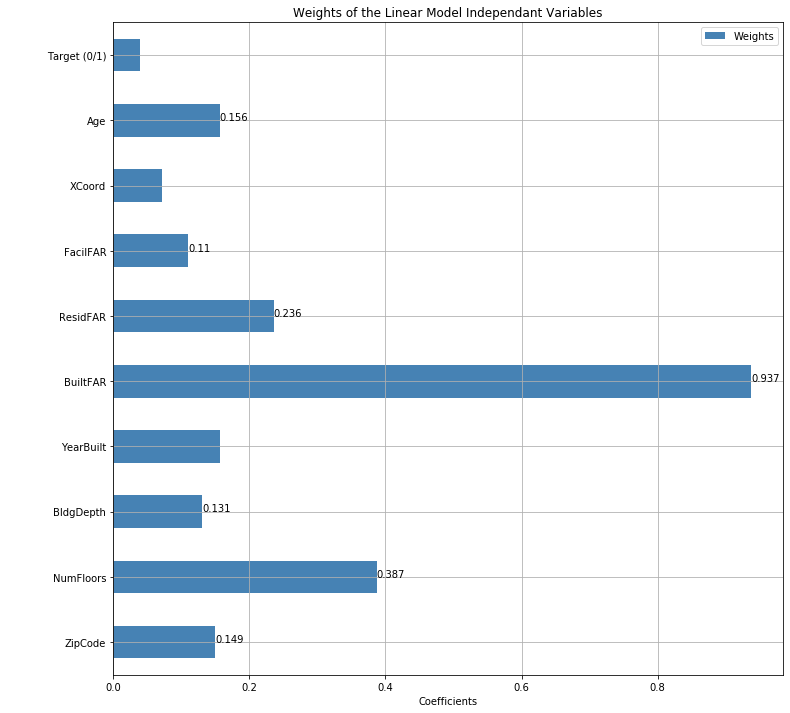

In [378]:
abs(weights_df).T.plot(kind='barh', figsize=(12, 12), color='steelblue', grid=True)
plt.xlabel('Coefficients')
plt.title('Weights of the Linear Model Independant Variables')

# annotate weight labels to each feature
for index, value in enumerate(weights): 
    label = '{:.3}'.format(float(value))
    plt.annotate(label, xy=(value, index), color='black')

plt.show()


Make predictions on our Logistic Regression Model using the test set

In [379]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

Probability Matrix
__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [380]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.84, 0.16],
       [0.31, 0.69],
       [0.85, 0.15],
       ...,
       [0.08, 0.92],
       [0.92, 0.08],
       [0.84, 0.16]])

## Evaluate the Model

Jaccard Similarity Index: If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [351]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/bugracanasci/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8479704370922109

Define a function to plot the confusion matrix

In [381]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 1149  2284]
 [  349 13537]]


Confusion matrix, without normalization
[[ 1149  2284]
 [  349 13537]]


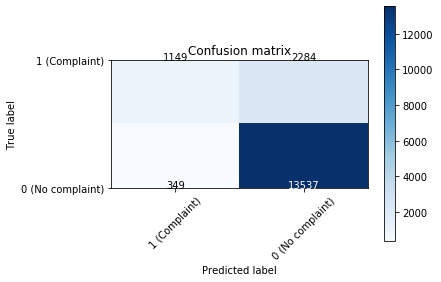

In [382]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 (Complaint)','0 (No complaint)'],normalize= False,  title='Confusion matrix')

In [354]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13886
           1       0.77      0.33      0.47      3433

    accuracy                           0.85     17319
   macro avg       0.81      0.65      0.69     17319
weighted avg       0.84      0.85      0.82     17319



Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. Low log loss is seeked in logistic regression models.

In [383]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.38620607131716694